In [1]:
#add project directory to python path
import sys
sys.path.append("..")
#import standard packages
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
%matplotlib inline
from default import PROJECT_DIRECTORY, DATA_DIRECTORY

# Halo Velocities

## Load Simulation

In [8]:
"""
load halo catalogue
"""
import h5py
from astropy.table import Table

filepath = DATA_DIRECTORY
filename = 'mdr1_fof_va.hdf5'
f = h5py.File(filepath+filename,'r')
dset = f['data']
d = {key: dset[key] for key in dset.dtype.names}
halo_table = Table(d)
print(halo_table.keys())

['vx_inner50', 'vx_inner70', 'rowid', 'vz_inner30', 'vy_inner50', 'vz_inner70', 'vy_inner10', 'vz_inner50', 'vy_inner70', 'vy_inner30', 'vx_inner90', 'haloid', 'vx', 'vy', 'vz', 'vx_central_ptcl', 'size', 'vz_std', 'vy_inner90', 'vz_inner80', 'vz_all', 'vx_inner20', 'vx_inner60', 'vx_inner01', 'vx_std', 'vy_inner40', 'vx_inner40', 'vz_inner40', 'vz_inner20', 'vz_inner60', 'vz_central_ptcl', 'vy_inner60', 'vy_all', 'vz_inner10', 'vy_central_ptcl', 'vx_inner80', 'vy_std', 'vz_inner90', 'vx_all', 'vy_inner80', 'vy_inner20', 'vx_inner30', 'mass', 'vz_inner01', 'y', 'x', 'z', 'vx_inner10', 'vy_inner01']


## Bulk vs. Core Velocity Distribution

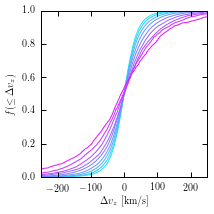

In [23]:
core_velocity_key = 'vz_inner10'
bluk_velocity_key = 'vz_all'

dv = halo_table[core_velocity_key]-halo_table[bluk_velocity_key]

#define halo mass bins
mass_bins = np.arange(13,15.0,0.2)
mass_bins = 10**mass_bins

#bin haloes by mass
inds = np.digitize(halo_table['mass'], bins=mass_bins)

#run through halo mass bins and calculate distribution of v_bulk-v_core
from matplotlib import cm 
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=(3.3,3.3))
fig.subplots_adjust(hspace=0, wspace=0, left=0.2, right=0.9, bottom=0.2, top=0.9)
axes = axes.flatten()
for i in range(1,len(mass_bins)):
    
    mask = (inds==i)

    dv_sub = dv[mask]
    
    #calculate cumulative distribution
    sorted_dv_sub = np.sort(dv_sub)
    N = len(dv_sub)
    cum_counts = np.arange(0,N,1)/N
    
    color = cm.cool(1.0*i/len(mass_bins))
    ax.plot(sorted_dv_sub, cum_counts, color=color)
ax.set_xlabel(r'$\Delta v_z ~ [{\rm km/s}]$')
ax.set_ylabel(r'$f(\leq \Delta v_z)$')
ax.set_xlim([-250,250])
plt.show()

In [24]:
"""
normalize by the virial velocity
"""

from astropy.constants import G
G_const = G.to('pc km^2 / (Msun*s^2)').value
v_norm = np.sqrt(halos['mass']*G_const/(halos['size']*10**6))*1.0/np.sqrt(3.0)

0.139125203313
0.134895360365
0.132891443257
0.132520476658
0.134912412956
0.134549419944
0.134580222696
0.130864444803
0.139455234839


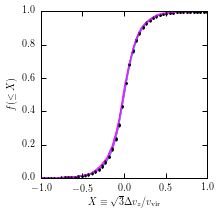

In [52]:
core_velocity_key = 'vz_inner10'
bluk_velocity_key = 'vz_all'

dv_norm = (halo_table[core_velocity_key]-halo_table[bluk_velocity_key])/v_norm

#define halo mass bins
mass_bins = np.arange(13,15.0,0.2)
mass_bins = 10**mass_bins

#bin haloes by mass
inds = np.digitize(halo_table['mass'], bins=mass_bins)

#run through halo mass bins and calculate distribution of v_bulk-v_core
from matplotlib import cm 
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=(3.3,3.3))
fig.subplots_adjust(hspace=0, wspace=0, left=0.2, right=0.9, bottom=0.2, top=0.9)
axes = axes.flatten()
x_sample = np.linspace(-1,1,50)
for i in range(1,len(mass_bins)):
    
    mask = (inds==i)

    dv_norm_sub = dv_norm[mask]
    scale = np.std(dv_norm_sub)/np.sqrt(2)
    print(scale)
    
    #calculate cumulative distribution
    sorted_dv_norm_sub = np.sort(dv_norm_sub)
    N = len(dv_norm_sub)
    cum_counts = np.arange(0,N,1)/N
    
    color = cm.cool(1.0*i/len(mass_bins))
    ax.plot(sorted_dv_norm_sub, cum_counts, color=color)
    ax.plot(x_sample , laplace.cdf(x_sample, loc=0.0, scale=scale),  'o', color='black', ms=2, mec='none')
ax.set_xlabel(r'$X \equiv \sqrt{3} \Delta v_z/v_{\rm vir}$')
ax.set_ylabel(r'$f(\leq X)$')
ax.set_xlim([-1,1])
plt.show()